# Marketing Campaign Response Prediction (ML Project)

## Data Loading & Initial Exploration
- Load dataset
- Check structure, missing values, datatypes

In [ ]:
import pandas as pd

df = pd.read_csv("marketing_campaign.csv", sep='\t')  
df.head()

In [ ]:
print('Shape:', df.shape)

print('\nColumns:')
print(df.columns)
print(df.info)

##  Data Cleaning
- Fix date column
- Handle missing income
- Check duplicates

In [4]:
df.isnull().sum()
df.fillna(df['Income'].median(), inplace=True)

In [5]:
df['Dt_Customer'].head()
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
df.duplicated().sum()
df.nunique()

## Feature Engineering
- Customer Tenure
- Age
- Family Size
- Total Spending

In [ ]:
# 1. Customer Tenure (Days since joining)
import datetime
today = datetime.datetime.today()
df['Customer_Tenure'] = (today - df['Dt_Customer']).dt.days

# 2. Customer Age
df['Age'] = 2025 - df['Year_Birth']  # Fixed typo in comment

# 3. Family Size (Assuming 2 adults + kids at home)
df['Family_Size'] = 2 + df['Kidhome'] + df['Teenhome']

# 4. Total Spending 
spending_col = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_col].sum(axis=1)


In [ ]:
df[['Customer_Tenure', 'Age', 'Family_Size', 'Total_Spending']].head()

## Exploratory Data Analysis (EDA)
- Age distribution
- Spending vs response

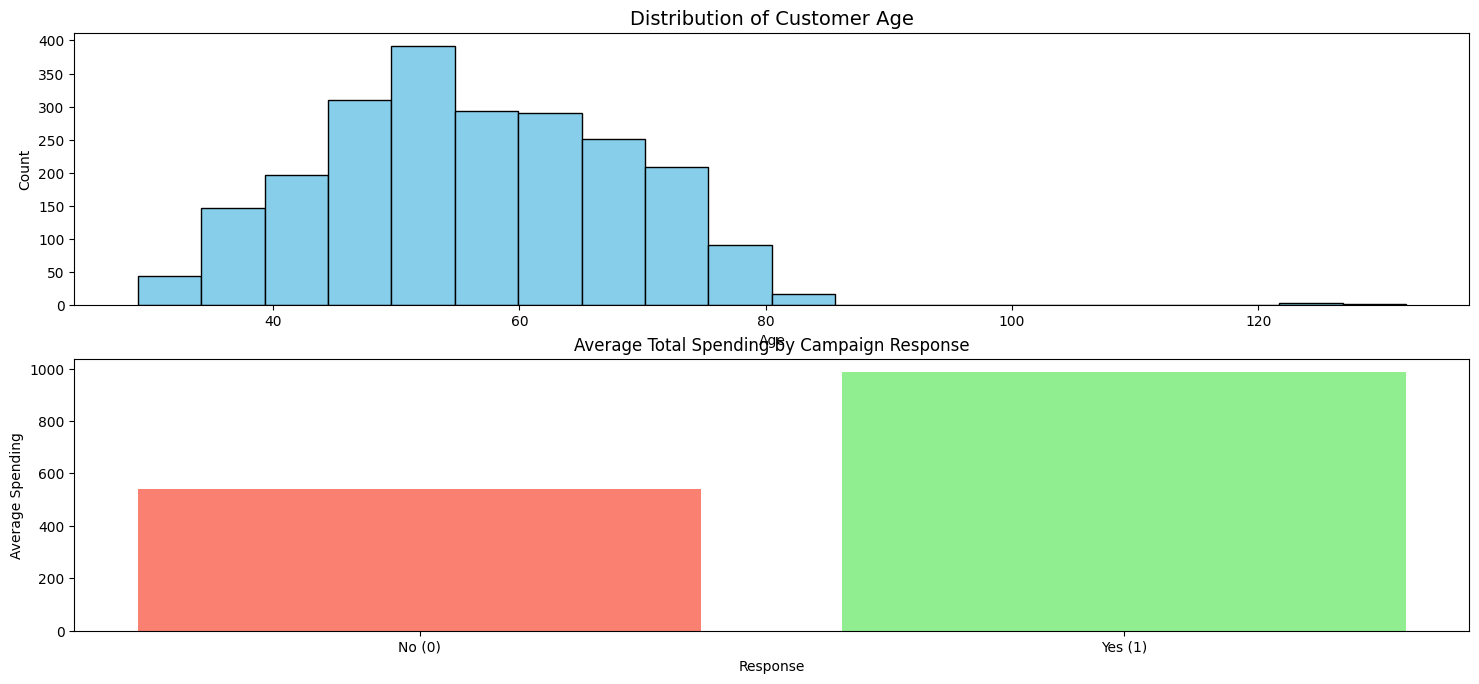

In [24]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(18, 12))

# Plot 1: Age Distribution
plt.subplot(3, 1, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')

# Plot 2: Total Spending by Campaign Response
plt.subplot(3, 1, 2)
avg_spend = df.groupby('Response')['Total_Spending'].mean()
plt.bar(['No (0)', 'Yes (1)'], avg_spend, color=['salmon', 'lightgreen'])
plt.title('Average Total Spending by Campaign Response')
plt.xlabel('Response')
plt.ylabel('Average Spending')

plt.show()


## Business Questions

1. **Which customer characteristics influence positive campaign response the most?**  
   This will help identify which features (like age, income, spending) are most predictive of a “yes” response.

2. **Do higher-spending customers respond better to marketing campaigns?**  
   This will explore whether overall spending affects likelihood of response — helping prioritize customer segments.

3. **How does customer age and income impact campaign response?**  
   This will analyze the effect of age and income levels on engagement with the campaign.


## Model Building
- Encode variables
- Train/test split
- Train Logistic Regression & Decision Tree

In [14]:
X = df.drop(['ID', 'Dt_Customer', 'Response'], axis=1)
y = df['Response']

In [15]:
X = pd.get_dummies(X, drop_first=True)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# 2. Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print("Both models trained successfully!")

## Model Evaluation
- Compare precision, recall, F1-score
- Confusion matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression predictions
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Evaluation:\n")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Decision Tree predictions
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Evaluation:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Logistic Regression Evaluation:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       379
           1       0.61      0.20      0.30        69

    accuracy                           0.86       448
   macro avg       0.74      0.59      0.61       448
weighted avg       0.83      0.86      0.83       448

Confusion Matrix:
 [[370   9]
 [ 55  14]]

Decision Tree Evaluation:

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       379
           1       0.40      0.39      0.40        69

    accuracy                           0.82       448
   macro avg       0.65      0.64      0.64       448
weighted avg       0.81      0.82      0.82       448

Confusion Matrix:
 [[339  40]
 [ 42  27]]


## Model Evaluation Summary

We trained and compared two classification models to predict customer responses to a marketing campaign:

---

#### 1. Logistic Regression
- **Accuracy:** 86%
- **Precision (Class 1):** 0.61
- **Recall (Class 1):** 0.20
- **F1-Score (Class 1):** 0.30

Logistic Regression performed well in identifying non-responders (class 0), but failed to correctly detect most actual responders. It missed 55 out of 69 responders, which is a significant limitation for marketing campaign effectiveness.

---

#### 2. Decision Tree Classifier
- **Accuracy:** 82%
- **Precision (Class 1):** 0.40
- **Recall (Class 1):** 0.39
- **F1-Score (Class 1):** 0.40

The Decision Tree model offered a better balance between identifying both responders and non-responders. It correctly identified 27 out of 69 responders, significantly outperforming Logistic Regression in that category.

---

## Conclusion
While Logistic Regression has a higher overall accuracy, the Decision Tree model is **more effective for campaign targeting**, as it captures more actual responders. This makes it the **preferred model for marketing strategy** in this case.

**Final Model Selected:** Decision Tree Classifier
